In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bbbf1dcf-b675-43ba-b0e1-403a449ed894',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-05-08T14:55:53.952Z', 'error_code': 0, 'error_message': None, 'elapsed': 45, 'credit_count': 1, 'notice': None, 'total_count': 9766}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12059, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [4]:
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,12059,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.986196e+07,1.986196e+07,False,NaN,1,NaN,NaN,None,2025-05-08T14:53:00.000Z,99814.932964,5.528849e+10,67.5198,0.537621,2.994466,3.289778,26.584629,19.833924,-0.293155,1.982520e+12,63.9193,2.096114e+12,None,2025-05-08T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,10282,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207322e+08,1.207322e+08,True,NaN,2,NaN,NaN,None,2025-05-08T14:53:00.000Z,2001.784770,2.305344e+10,60.9068,1.501991,10.101807,8.566123,30.159681,-5.188394,-28.331835,2.416799e+11,7.7948,2.416799e+11,None,2025-05-08T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,127068,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.495043e+11,1.535107e+11,True,NaN,3,NaN,NaN,None,2025-05-08T14:54:00.000Z,1.000591,7.945866e+10,35.9577,0.041898,0.047047,0.010746,0.091025,0.088689,-0.000773,1.495927e+11,4.8130,1.536015e+11,None,2025-05-08T14:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1604,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.850355e+10,9.998618e+10,False,NaN,4,NaN,NaN,None,2025-05-08T14:53:00.000Z,2.227118,4.929831e+09,140.3359,0.843313,4.541403,-0.266328,16.127417,1.236416,-12.041403,1.302943e+11,4.1978,2.227118e+11,None,2025-05-08T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN
4,1839,BNB,BNB,bnb,2513,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408893e+08,1.408893e+08,False,NaN,5,NaN,NaN,None,2025-05-08T14:54:00.000Z,618.436370,1.780657e+09,15.0101,0.510691,2.480905,2.413229,10.601181,8.586060,4.909860,8.713109e+10,2.8092,8.713109e+10,None,2025-05-08T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN
5,5426,Solana,SOL,solana,912,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.188970e+08,6.002078e+08,True,NaN,6,NaN,NaN,None,2025-05-08T14:55:00.000Z,157.913986,5.776366e+09,94.8192,1.891988,8.113168,3.441050,45.973753,19.078646,-22.235728,8.194110e+10,2.6419,9.478121e+10,None,2025-05-08T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,27655,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.096455e+10,6.096455e+10,False,NaN,7,NaN,NaN,None,2025-05-08T14:54:00.000Z,1.000435,1.225338e+10,27.7164,0.036940,0.033249,0.032851,0.038530,0.057690,0.030861,6.099106e+10,1.9664,6.099106e+10,None,2025-05-08T14:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1218,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.491781e+11,1.491781e+11,True,NaN,8,NaN,NaN,None,2025-05-08T14:55:00.000Z,0.186575,1.253268e+09,75.6820,1.313281,8.620973,3.166930,23.278593,3.690678,-28.528213,2.783295e+10,0.8967,2.783295e+10,None,2025-05-08T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,1512,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.530864e+10,4.499501e+10,False,NaN,9,NaN,NaN,None,2025-05-08T14:54:00.000Z,0.725294,9.271229e+08,51.1091,1.006511,8.410113,3.097349,21.005091,-5.093217,-3.133518,2.560913e+10,0.8257,3.263821e+10,None,2025-05-08T14:54:00.000Z,NaN,NaN,NaN,Na

In [5]:
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12059,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.986196e+07,1.986196e+07,False,NaN,1,NaN,NaN,None,2025-05-08T14:53:00.000Z,99814.932964,5.528849e+10,67.5198,0.537621,2.994466,3.289778,26.584629,19.833924,-0.293155,1.982520e+12,63.9193,2.096114e+12,None,2025-05-08T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:58.711812
1,1027,Ethereum,ETH,ethereum,10282,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207322e+08,1.207322e+08,True,NaN,2,NaN,NaN,None,2025-05-08T14:53:00.000Z,2001.784770,2.305344e+10,60.9068,1.501991,10.101807,8.566123,30.159681,-5.188394,-28.331835,2.416799e+11,7.7948,2.416799e+11,None,2025-05-08T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:58.711812
2,825,Tether USDt,USDT,tether,127068,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.495043e+11,1.535107e+11,True,NaN,3,NaN,NaN,None,2025-05-08T14:54:00.000Z,1.000591,7.945866e+10,35.9577,0.041898,0.047047,0.010746,0.091025,0.088689,-0.000773,1.495927e+11,4.8130,1.536015e+11,None,2025-05-08T14:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-08 20:25:58.711812
3,52,XRP,XRP,xrp,1604,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.850355e+10,9.998618e+10,False,NaN,4,NaN,NaN,None,2025-05-08T14:53:00.000Z,2.227118,4.929831e+09,140.3359,0.843313,4.541403,-0.266328,16.127417,1.236416,-12.041403,1.302943e+11,4.1978,2.227118e+11,None,2025-05-08T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:58.711812
4,1839,BNB,BNB,bnb,2513,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408893e+08,1.408893e+08,False,NaN,5,NaN,NaN,None,2025-05-08T14:54:00.000Z,618.436370,1.780657e+09,15.0101,0.510691,2.480905,2.413229,10.601181,8.586060,4.909860,8.713109e+10,2.8092,8.713109e+10,None,2025-05-08T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:58.711812
5,5426,Solana,SOL,solana,912,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.188970e+08,6.002078e+08,True,NaN,6,NaN,NaN,None,2025-05-08T14:55:00.000Z,157.913986,5.776366e+09,94.8192,1.891988,8.113168,3.441050,45.973753,19.078646,-22.235728,8.194110e+10,2.6419,9.478121e+10,None,2025-05-08T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:58.711812
6,3408,USDC,USDC,usd-coin,27655,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.096455e+10,6.096455e+10,False,NaN,7,NaN,NaN,None,2025-05-08T14:54:00.000Z,1.000435,1.225338e+10,27.7164,0.036940,0.033249,0.032851,0.038530,0.057690,0.030861,6.099106e+10,1.9664,6.099106e+10,None,2025-05-08T14:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-08 20:25:58.711812
7,74,Dogecoin,DOGE,dogecoin,1218,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.491781e+11,1.491781e+11,True,NaN,8,NaN,NaN,None,2025-05-08T14:55:00.000Z,0.186575,1.253268e+09,75.6820,1.313281,8.620973,3.166930,23.278593,3.690678,-28.528213,2.783295e+10,0.8967,2.783295e+10,None,2025-05-08T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:58.711812
8,2010,Cardano,ADA,cardano,1512,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.530864e+10,4

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'bbbf1dcf-b675-43ba-b0e1-403a449ed894',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\HP\Downloads\numpy\pandaslearning\API.csv'):
        df.to_csv(r'C:\Users\HP\Downloads\numpy\pandaslearning\API.csv',index=False)
    else:
        df.to_csv(r'C:\Users\HP\Downloads\numpy\pandaslearning\API.csv',mode='a',header=False, index =False)
        

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2025-05-08T14:56:00.209Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 9766}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12059, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [8]:
print(df.head())
print(df.info())

     id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             12059   
1  1027     Ethereum    ETH  ethereum             10282   
2   825  Tether USDt   USDT    tether            127068   
3    52          XRP    XRP       xrp              1604   
4  1839          BNB    BNB       bnb              2513   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2013-08-04T00:00:00.000Z   
4  2017-07-25T00:00:00.000Z   

                                                tags    max_supply  \
0  [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1  [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2  [stablecoin, asset-backed-stablecoin, usd-stab...           NaN   
3  [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
4  [marketplace, centralized-exchange, payments, ...           NaN   

   circulating_supply  total_supply  

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12059,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.986196e+07,1.986196e+07,False,NaN,1,NaN,NaN,None,2025-05-08T14:58:00.000Z,99554.340428,5.619213e+10,59.8509,0.180475,2.787894,2.778543,26.771597,19.091439,-0.210834,1.977344e+12,63.6300,2.090641e+12,None,2025-05-08T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:30:05.611790
1,1027,Ethereum,ETH,ethereum,10282,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207322e+08,1.207322e+08,True,NaN,2,NaN,NaN,None,2025-05-08T14:55:00.000Z,1994.983926,2.317072e+10,46.1178,1.074883,9.620168,8.126342,29.978257,-5.534327,-28.468105,2.408588e+11,7.7493,2.408588e+11,None,2025-05-08T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:30:05.611790
2,825,Tether USDt,USDT,tether,127068,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.495043e+11,1.535107e+11,True,NaN,3,NaN,NaN,None,2025-05-08T14:58:00.000Z,1.000189,7.957520e+10,34.5255,0.010051,0.006374,-0.036216,0.061724,0.049561,-0.039476,1.495325e+11,4.8110,1.535396e+11,None,2025-05-08T14:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-08 20:30:05.611790
3,52,XRP,XRP,xrp,1604,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.850355e+10,9.998618e+10,False,NaN,4,NaN,NaN,None,2025-05-08T14:59:00.000Z,2.224860,4.966523e+09,141.9744,0.636123,4.609504,-0.638790,16.945702,0.848462,-12.132589,1.301622e+11,4.1972,2.224860e+11,None,2025-05-08T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:30:05.611790
4,1839,BNB,BNB,bnb,2513,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408893e+08,1.408893e+08,False,NaN,5,NaN,NaN,None,2025-05-08T14:58:00.000Z,617.520670,1.785141e+09,15.1081,0.242291,2.423093,2.183023,10.618714,8.296750,4.812158,8.700208e+10,2.7997,8.700208e+10,None,2025-05-08T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:30:05.611790
5,5426,Solana,SOL,solana,912,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.188970e+08,6.002078e+08,True,NaN,6,NaN,NaN,None,2025-05-08T14:57:00.000Z,157.649177,5.782820e+09,94.8982,1.671439,7.967517,3.083127,46.125556,18.611543,-22.363061,8.180369e+10,2.6324,9.462227e+10,None,2025-05-08T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:30:05.611790
6,3408,USDC,USDC,usd-coin,27655,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.096455e+10,6.096455e+10,False,NaN,7,NaN,NaN,None,2025-05-08T14:57:00.000Z,1.000322,1.213827e+10,26.1036,0.033732,0.032352,0.009111,0.016630,0.052280,0.031559,6.098416e+10,1.9624,6.098416e+10,None,2025-05-08T14:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-08 20:30:05.611790
7,74,Dogecoin,DOGE,dogecoin,1218,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.491781e+11,1.491781e+11,True,NaN,8,NaN,NaN,None,2025-05-08T14:56:00.000Z,0.186407,1.254274e+09,75.8060,1.199357,8.527966,3.060938,23.164429,3.572446,-28.594256,2.780791e+10,0.8959,2.780791e+10,None,2025-05-08T14:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:30:05.611790
8,2010,Cardano,ADA,cardano,1512,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.530864e+10,4

In [11]:
pd.set_option('display.float_format', lambda x: "%.5f" % x)
df2 = pd.read_csv(r'C:\Users\HP\Downloads\numpy\pandaslearning\API.csv')
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12059,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19861956.00000,19861956.00000,False,NaN,1,NaN,NaN,NaN,2025-05-08T14:53:00.000Z,99814.93296,55288492078.56110,67.51980,0.53762,2.99447,3.28978,26.58463,19.83392,-0.29315,1982519806675.11890,63.91930,2096113592245.27002,NaN,2025-05-08T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:59.852926
1,1027,Ethereum,ETH,ethereum,10282,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120732202.35321,120732202.35321,True,NaN,2,NaN,NaN,NaN,2025-05-08T14:53:00.000Z,2001.78477,23053439410.85619,60.90680,1.50199,10.10181,8.56612,30.15968,-5.18839,-28.33183,241679883884.62985,7.79480,241679883884.63000,NaN,2025-05-08T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:59.852926
2,825,Tether USDt,USDT,tether,127068,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,149504280849.84122,153510658825.10455,True,NaN,3,NaN,NaN,NaN,2025-05-08T14:54:00.000Z,1.00059,79458663647.79227,35.95770,0.04190,0.04705,0.01075,0.09102,0.08869,-0.00077,149592712297.69629,4.81300,153601460036.57001,NaN,2025-05-08T14:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-08 20:25:59.852926
3,52,XRP,XRP,xrp,1604,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58503545101.00000,99986181777.00000,False,NaN,4,NaN,NaN,NaN,2025-05-08T14:53:00.000Z,2.22712,4929831392.54205,140.33590,0.84331,4.54140,-0.26633,16.12742,1.23642,-12.04140,130294310593.60834,4.19780,222711820913.88000,NaN,2025-05-08T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:59.852926
4,1839,BNB,BNB,bnb,2513,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,140889341.99000,140889341.99000,False,NaN,5,NaN,NaN,NaN,2025-05-08T14:54:00.000Z,618.43637,1780657147.62127,15.01010,0.51069,2.48090,2.41323,10.60118,8.58606,4.90986,87131093166.23923,2.80920,87131093166.24001,NaN,2025-05-08T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:59.852926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,20947,Sui,SUI,sui,641,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",10000000000.00000,3338327017.91166,10000000000.00000,False,NaN,11,3338327017.91166,12625676748.92029,NaN,2025-05-08T14:58:00.000Z,3.78204,2284098267.04255,58.72090,-0.35391,13.77735,1.44444,87.36315,58.89773,12.60671,12625676748.92029,0.40620,37820371345.22000,NaN,2025-05-08T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:30:05.611790
71,1975,Chainlink,LINK,chainlink,2003,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,657099970.45279,1000000000.00000,False,NaN,12,NaN,NaN,NaN,2025-05-08T14:58:00.000Z,14.92303,373873277.70468,40.89100,0.30570,9.31951,0.11014,29.90309,4.26482,-24.32148,9805920010.88342,0.31560,14923026102.29000,NaN,2025-05-08T14:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-05-08 20:30:05.611790
72,5805,Avalanche,AVAX,avalanche,911,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,417950510.19894,454620010.19894,False,NaN,13,NaN,NaN,NaN,2025

In [12]:
df3 = df2.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3 

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.22105,2.78472,2.89626,26.66102,19.23417,-0.28162
Ethereum,1.10756,9.69345,8.16052,30.02045,-5.51540,-28.43413
Tether USDt,0.01711,0.02000,-0.02720,0.05952,0.05685,-0.02998
XRP,0.76740,4.64614,-0.39582,16.56086,1.10184,-12.06621
BNB,0.38087,2.48364,2.30660,10.65927,8.45059,4.89044
Solana,1.77578,8.03107,3.26586,45.99776,18.85407,-22.30950
USDC,0.02953,0.02426,0.00691,0.01736,0.04596,0.02344
Dogecoin,1.16460,8.51995,3.01031,23.21170,3.51273,-28.58713
Cardano,0.80723,8.40022,2.85434,21.06372,-5.41241,-3.21853


In [13]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     0.22105
              quote.USD.percent_change_24h    2.78472
              quote.USD.percent_change_7d     2.89626
              quote.USD.percent_change_30d   26.66102
              quote.USD.percent_change_60d   19.23417
                                               ...   
Bitcoin Cash  quote.USD.percent_change_24h   14.44499
              quote.USD.percent_change_7d    12.15790
              quote.USD.percent_change_30d   48.83188
              quote.USD.percent_change_60d   13.32509
              quote.USD.percent_change_90d   24.56635
Length: 90, dtype: float64

In [14]:
pd.set_option('display.max_rows', 100)
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.22105
             quote.USD.percent_change_24h   2.78472
             quote.USD.percent_change_7d    2.89626
             quote.USD.percent_change_30d  26.66102
             quote.USD.percent_change_60d  19.23417
             quote.USD.percent_change_90d  -0.28162
Ethereum     quote.USD.percent_change_1h    1.10756
             quote.USD.percent_change_24h   9.69345
             quote.USD.percent_change_7d    8.16052
             quote.USD.percent_change_30d  30.02045
             quote.USD.percent_change_60d  -5.51540
             quote.USD.percent_change_90d -28.43413
Tether USDt  quote.USD.percent_change_1h    0.01711
             quote.USD.percent_change_24h   0.02000
             quote.USD.percent_change_7d   -0.02720
             quote.USD.percent_change_30d   0.05952
             quote.USD.percent_change_60d   0.05685
             quote.USD.percent_change_90d  -0.02998
XRP          quote.USD.percent_change_1h    0.76740
             quote.USD.percent_change_24h   4.64614
             quote.USD.percent_change_7d   -0.39582
             quote.USD.percent_change_30d  16.56086
             quote.USD.percent_change_60d   1.10184
             quote.USD.percent_change_90d -12.06621
BNB          quote.USD.percent_change_1h    0.38087
             quote.USD.percent_change_24h   2.48364
             quote.USD.percent_change_7d    2.30660
             quote.USD.percent_change_30d  10.65927
             quote.USD.percent_change_60d   8.45059
             quote.USD.percent_change_90d   4.89044
Solana       quote.USD.percent_change_1h    1.77578
             quote.USD.percent_change_24h   8.03107
             quote.USD.percent_change_7d    3.26586
             quote.USD.percent_change_30d  45.99776
             quote.USD.percent_change_60d  18.85407
             quote.USD.percent_change_90d -22.30950
USDC         quote.USD.percent_change_1h    0.02953
             quote.USD.percent_change_24h   0.02426
             quote.USD.percent_change_7d    0.00691
             quote.USD.percent_change_30d   0.01736
             quote.USD.percent_change_60d   0.04596
             quote.USD.percent_change_90d   0.02344
Dogecoin     quote.USD.percent_change_1h    1.16460
             quote.USD.percent_change_24h   8.51995
             quote.USD.percent_change_7d    3.01031
             quote.USD.percent_change_30d  23.21170
             quote.USD.percent_change_60d   3.51273
             quote.USD.percent_change_90d -28.58713
Cardano      quote.USD.percent_change_1h    0.80723
             quote.USD.percent_change_24h   8.40022
             quote.USD.percent_change_7d    2.85434
             quote.USD.percent_change_30d  21.06372
             quote.USD.percent_change_60d  -5.41241
             quote.USD.percent_change_90d  -3.21853
TRON         quote.USD.percent_change_1h   -0.02774
             quote.USD.percent_change_24h   1.39090
             quote.USD.percent_change_7d    0.66591
             quote.USD.percent_change_30d   6.80331
             quote.USD.percent_change_60d   3.73069
             quote.USD.percent_change_90d   7.79964
Sui          quote.USD.percent_change_1h    0.01187
             quote.USD.percent_change_24h  14.06824
             quote.USD.percent_change_7d    1.91352
             quote.USD.percent_change_30d  87.74576
             quote.USD.percent_change_60d  59.47798
             quote.USD.percent_change_90d  12.72793
Chainlink    quote.USD.percent_change_1h    0.53675
             quote.USD.percent_change_24h   9.46926
             quote.USD.percent_change_7d    0.36512
             quote.USD.percent_change_30d  29.84907
             quote.USD.percent_change_60d   4.53851
             quote.USD.percent_change_90d -24.24358
Avalanche    quote.USD.percent_change_1h    0.82529
             quote.USD.percent_change_24h   7.67679
             quote.USD.percent_change_7d   -1.94457
             quote.USD.percent_change_30d

In [15]:
index = pd.Index(range(len(df5)))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.22105
1,Bitcoin,quote.USD.percent_change_24h,2.78472
2,Bitcoin,quote.USD.percent_change_7d,2.89626
3,Bitcoin,quote.USD.percent_change_30d,26.66102
4,Bitcoin,quote.USD.percent_change_60d,19.23417
5,Bitcoin,quote.USD.percent_change_90d,-0.28162
6,Ethereum,quote.USD.percent_change_1h,1.10756
7,Ethereum,quote.USD.percent_change_24h,9.69345
8,Ethereum,quote.USD.percent_change_7d,8.16052
9,Ethereum,quote.USD.percent_change_30d,30.02045


In [16]:
df6 = df6.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.22105
1,Bitcoin,quote.USD.percent_change_24h,2.78472
2,Bitcoin,quote.USD.percent_change_7d,2.89626
3,Bitcoin,quote.USD.percent_change_30d,26.66102
4,Bitcoin,quote.USD.percent_change_60d,19.23417
5,Bitcoin,quote.USD.percent_change_90d,-0.28162
6,Ethereum,quote.USD.percent_change_1h,1.10756
7,Ethereum,quote.USD.percent_change_24h,9.69345
8,Ethereum,quote.USD.percent_change_7d,8.16052
9,Ethereum,quote.USD.percent_change_30d,30.02045


In [17]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.22105
1,Bitcoin,24h,2.78472
2,Bitcoin,7d,2.89626
3,Bitcoin,30d,26.66102
4,Bitcoin,60d,19.23417
5,Bitcoin,90d,-0.28162
6,Ethereum,1h,1.10756
7,Ethereum,24h,9.69345
8,Ethereum,7d,8.16052
9,Ethereum,30d,30.02045


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

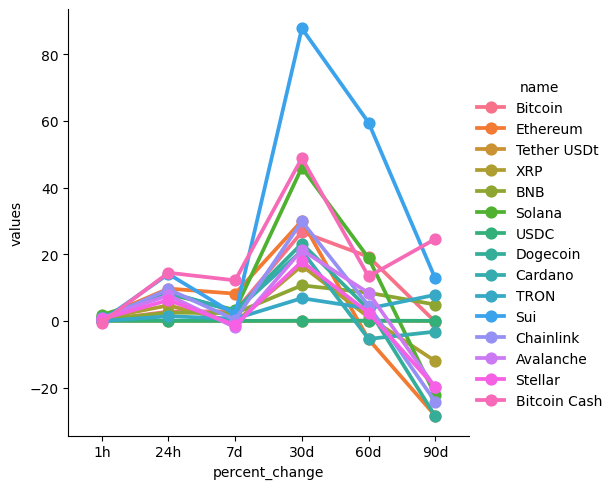

In [19]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind ='point')

In [24]:
df7 = df[['name','quote.USD.price','timestamp']]
#df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,99554.34043,2025-05-08 20:30:05.611790
1,Ethereum,1994.98393,2025-05-08 20:30:05.611790
2,Tether USDt,1.00019,2025-05-08 20:30:05.611790
3,XRP,2.22486,2025-05-08 20:30:05.611790
4,BNB,617.52067,2025-05-08 20:30:05.611790
5,Solana,157.64918,2025-05-08 20:30:05.611790
6,USDC,1.00032,2025-05-08 20:30:05.611790
7,Dogecoin,0.18641,2025-05-08 20:30:05.611790
8,Cardano,0.72327,2025-05-08 20:30:05.611790
9,TRON,0.25012,2025-05-08 20:30:05.611790


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

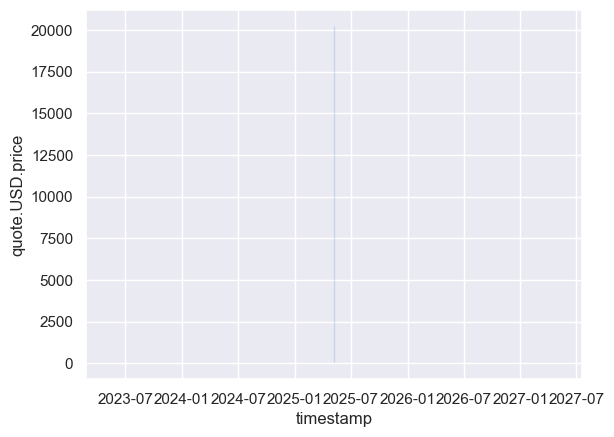

In [26]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y ='quote.USD.price', data = df)